# Netflix Exploratory Data Analysis V1

## About Dataset

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in May 2022 containing data available in the United States.

## Step 1: Import the necessary libraries

In [2]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import random
import plotly.graph_objects as go

## Step 2: Load dataset

In [3]:
data_titles = pd.read_csv(r'C:\Users\melli\OneDrive\Desktop\Python Portfolio\1. Netflix Analysis\Dataset\titles.csv')

## Step 3: Understand the dataset

In [4]:
data_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
data_titles.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0


In [6]:
data_titles.shape

(5806, 15)

In [7]:
data_titles.nunique()

id                      5806
title                   5751
type                       2
description             5785
release_year              67
age_certification         11
runtime                  205
genres                  1626
production_countries     449
seasons                   23
imdb_id                 5362
imdb_score                81
imdb_votes              3831
tmdb_popularity         4943
tmdb_score                78
dtype: int64

In [8]:
data_titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


## Step 4: Drop any columns that are unnecessary for this analysis

In [9]:
data_titles=data_titles.drop(['id', 'age_certification', 'runtime', 'seasons', 'imdb_id', 'imdb_votes', 'tmdb_popularity'], axis=1)

In [10]:
data_titles.head()

,title,type,description,release_year,genres,production_countries,imdb_score,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,['documentation'],['US'],NaN,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,"['crime', 'drama']",['US'],8.3,8.2
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,"['comedy', 'fantasy']",['GB'],8.2,7.8
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,['comedy'],['GB'],8.0,7.8
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,['horror'],['US'],8.1,7.7


## Step 5: Clean dataset

In [11]:
data_titles.isnull().sum()

title                     1
type                      0
description              18
release_year              0
genres                    0
production_countries      0
imdb_score              523
tmdb_score              318
dtype: int64

### Since we require imdb and tmdb score for this analysis, I used the mean value to replace the null value in the dataset

In [12]:
avg_imdb_score = data_titles['imdb_score'].astype('float').mean(axis=0)
data_titles['imdb_score'].replace(np.nan, avg_imdb_score,  inplace=True)

In [13]:
avg_tmdb_score = data_titles['tmdb_score'].astype('float').mean(axis=0)
data_titles['tmdb_score'].replace(np.nan, avg_tmdb_score,  inplace=True)

In [14]:
data_titles.isnull().sum()

title                    1
type                     0
description             18
release_year             0
genres                   0
production_countries     0
imdb_score               0
tmdb_score               0
dtype: int64

### There are multiple variables within the genres value. To avoid multiple duplicates within the column, I've used the lambda function to only select the first variable in each value.

In [15]:
data_titles['genres'] = data_titles['genres'].apply(lambda x: x.split(',')[0])

In [16]:
data_titles.head()

,title,type,description,release_year,genres,production_countries,imdb_score,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,['documentation'],['US'],6.533447,6.818039
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,['crime',['US'],8.300000,8.200000
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,['comedy',['GB'],8.200000,7.800000
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,['comedy'],['GB'],8.000000,7.800000
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,['horror'],['US'],8.100000,7.700000


## Step 6: Perform exploratory data analysis

### Which type of content is more widely available on Netflix

<AxesSubplot:title={'center':'Type of Content on Netflix'}, ylabel='imdb_score'>

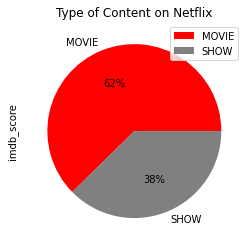

In [17]:
data_titles.groupby(['type']).sum().plot(kind='pie', y='imdb_score', title='Type of Content on Netflix', colors=['red', 'grey'], autopct='%1.0f%%')

### What type of genres are more widely available on Netflix?

C:\Users\melli\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


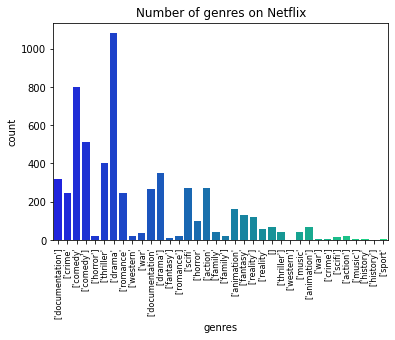

In [18]:
sns.countplot(data_titles['genres'], palette='winter')

plt.title('Number of genres on Netflix')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('genres')
plt.ylabel('count')
plt.show()

### Which genres garners a high imdb score?

In [20]:
comedy = data_titles[data_titles['genres'] == "['comedy']"]
drama = data_titles[data_titles['genres'] == "['drama']"]
thriller = data_titles[data_titles['genres'] == "['thriller']"]
romance = data_titles[data_titles['genres'] == "['romance']"]
action = data_titles[data_titles['genres'] == "['action']"]
crime = data_titles[data_titles['genres'] == "['crime']"]
documentation = data_titles[data_titles['genres'] == "['documentation']"]
scifi = data_titles[data_titles['genres'] == "['scifi']"]
animation = data_titles[data_titles['genres'] == "['animation']"]
reality = data_titles[data_titles['genres'] == "['reality']"]
horror = data_titles[data_titles['genres'] == "['horror']"]
family = data_titles[data_titles['genres'] == "['family']"]
music = data_titles[data_titles['genres'] == "['music']"]
war = data_titles[data_titles['genres'] == "['war']"]
western = data_titles[data_titles['genres'] == "['western']"]
fantasy = data_titles[data_titles['genres'] == "['fantasy']"]
history = data_titles[data_titles['genres'] == "['history']"]
sport = data_titles[data_titles['genres'] == "['sport']"]

mean_values = [comedy['imdb_score'].mean(), drama['imdb_score'].mean(), thriller['imdb_score'].mean(), romance['imdb_score'].mean(),
              action['imdb_score'].mean(), crime['imdb_score'].mean(), documentation['imdb_score'].mean(), 
               scifi['imdb_score'].mean(), animation['imdb_score'].mean(), reality['imdb_score'].mean(),
              horror['imdb_score'].mean(), family['imdb_score'].mean(), music['imdb_score'].mean(),
              war['imdb_score'].mean(), western['imdb_score'].mean(), fantasy['imdb_score'].mean(), 
               history['imdb_score'].mean(), sport['imdb_score'].mean()]

genres = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

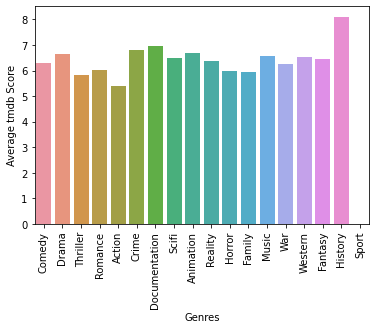

In [21]:
imdb_plot = sns.barplot(x = genres, y = mean_values)
imdb_plot.set_xlabel('Genres')
imdb_plot.set_ylabel('Average tmdb Score')
imdb_plot.set_xticklabels(['Comedy', 'Drama', 'Thriller', 'Romance', 'Action', 'Crime', 'Documentation', 'Scifi', 'Animation', 'Reality',
                          'Horror', 'Family', 'Music', 'War', 'Western', 'Fantasy', 'History', 'Sport'])  
plt.xticks(rotation='vertical', size=10)
plt.show()

### Which movies have the highest imdb score? 

In [71]:
# Top 10 movies with highest rating based on imdb score
top_20_imdb_score = data_titles.sort_values(['imdb_score'], ascending= False)[['title','imdb_score']].head(20)

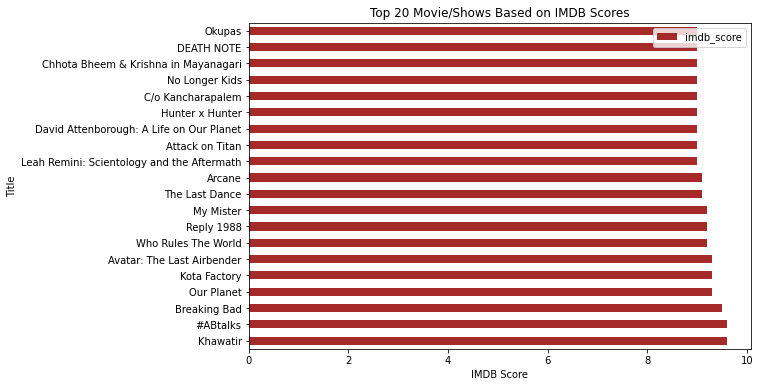

In [31]:
top_20_imdb_score.plot(kind='barh', x = 'title', y = 'imdb_score', figsize=(9, 6), color = 'brown')
plt.title('Top 20 Movie/Shows Based on IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Title')
plt.show()

### Which actor/director are most popular on Netflix based on TMDB Popularity? 

In [72]:
# Top 10 names with highest rating based on tmdb score and popularity
top_20_tmdb_rating = data_id.sort_values(['tmdb_score', 'tmdb_popularity'], ascending= False)[['name','tmdb_score','tmdb_popularity', 'type']].head(20)

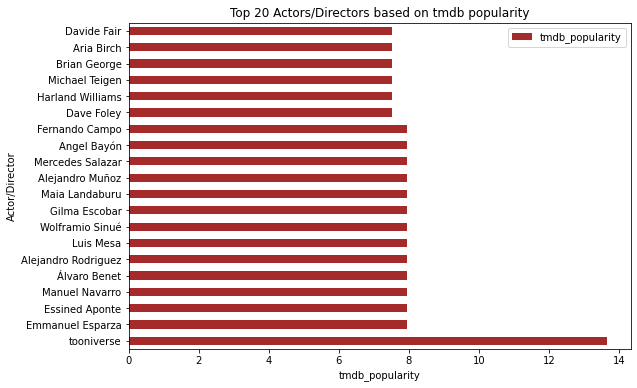

In [60]:
top_20_tmdb_rating.plot(kind='barh', x = 'name', y = 'tmdb_popularity', figsize=(9, 6), color = 'brown')
plt.title('Top 20 Actors/Directors based on tmdb popularity')
plt.xlabel('tmdb_popularity')
plt.ylabel('Actor/Director')
plt.show()

In [79]:
US = data_id[data_id['production_countries']== 'US']
top_20_show = US.sort_values(['title', 'imdb_score'], ascending= False)[['title','imdb_score','production_countries', 'type']].head(20)

## Step 7: Create basic recommendation tool

### Merged credits dataset with title dataset to include actors name in the recommendation

In [24]:
data_credits = pd.read_csv(r'C:\Users\melli\OneDrive\Desktop\Python Portfolio\1. Netflix Analysis\Dataset\credits.csv')
data_source_titles=pd.read_csv(r'C:\Users\melli\OneDrive\Desktop\Python Portfolio\1. Netflix Analysis\Dataset\titles.csv')

In [25]:
data_id = data_credits.merge(data_source_titles, on='id', how='left')
data_id.head(1)

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [26]:
data_recommendation=data_id.copy()

In [27]:
data_recommendation=data_recommendation.drop(['person_id','id','role','type', 
                                              'release_year','seasons','production_countries','imdb_votes',
                                              'imdb_id','tmdb_popularity'], axis=1)

In [29]:
n_samples = 10

for _ in range(n_samples):
    i = random.choice(range(data_recommendation.shape[0]))
    print(f"REVIEW TEXT\n\nTitle: {data_recommendation['title'][i]}\nActor: {data_recommendation['name'][i]}\nGenres: {data_recommendation['genres'][i]}\nGenres: {data_recommendation['genres'][i]}\nRuntime:{data_recommendation['runtime'][i]} \n\nIMDB:{data_recommendation['imdb_score'][i]}\nRotten Tomato:{data_recommendation['tmdb_score'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT

Title: Loving
Actor: Alano Miller
Genres: ['drama', 'romance']
Genres: ['drama', 'romance']
Runtime:123 

IMDB:7.0
Rotten Tomato:6.7

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT

Title: The Vault
Actor: Axel Stein
Genres: ['action', 'thriller', 'crime', 'fantasy']
Genres: ['action', 'thriller', 'crime', 'fantasy']
Runtime:118 

IMDB:6.4
Rotten Tomato:5.9

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT

Title: Public Enemies
Actor: Channing Tatum
Genres: ['crime', 'drama', 'history', 'action', 'european']
Genres: ['crime', 'drama', 'history', 'action', 'european']
Runtime:143 

IMDB:7.0
Rotten Tomato:6.7

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT

Title: The Hows of Us
Actor: Tingue Dongelmans
Genres: ['drama', 'comedy', 'romance']
Genres: ['drama', 'comedy', 'romance']
Runtime:117 

IMDB:6.7